=== Podstawowe informacje o danych ===
Liczba wierszy: 836
Liczba kolumn: 31

=== Typy kolumn ===
int64      16
float64     8
object      7
Name: count, dtype: int64 

=== Przykładowe wiersze ===


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


=== Brakujące wartości w zbiorze ===
Brak brakujących wartości 🎉
=== Statystyki opisowe (numeryczne) ===


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,49.958134,1.940191,118.515550,6.057297,7.018541,6.084330,0.212919,0.244019,0.077751,25.430981,0.854234,114.891148,74.904306,69.857656,186.355263,53.971292,103.552632,118.137560,110.913876,159.464115,8.845263,6.510359,29.910766,0.592105
std,15.322229,1.402739,79.963725,1.798591,1.061364,2.464343,0.409616,0.429761,0.267940,3.417690,0.046479,14.410454,8.005114,8.391760,31.688217,10.038567,33.554829,42.482024,13.777783,31.130591,4.894291,0.832719,8.895558,0.491738
min,18.000000,0.000000,2.000000,0.000000,4.100000,0.500000,0.000000,0.000000,0.000000,16.500000,0.710000,90.000000,51.000000,44.000000,100.000000,23.000000,50.000000,30.000000,66.000000,70.000000,2.000000,4.000000,7.300000,0.000000
25%,39.000000,1.000000,57.750000,4.800000,6.300000,4.400000,0.000000,0.000000,0.000000,23.100000,0.820000,105.000000,69.000000,64.000000,164.000000,47.000000,79.000000,89.000000,101.000000,137.750000,4.765000,5.930000,23.500000,0.000000
50%,50.000000,2.000000,100.000000,6.000000,7.000000,6.100000,0.000000,0.000000,0.000000,25.300000,0.850000,115.000000,75.000000,70.000000,187.000000,54.000000,102.000000,116.500000,111.000000,160.000000,8.310000,6.510000,28.550000,1.000000
75%,60.000000,3.000000,158.000000,7.300000,7.725000,7.900000,0.000000,0.000000,0.000000,27.700000,0.880000,125.000000,80.000000,75.000000,207.000000,61.000000,127.000000,145.000000,120.000000,180.250000,12.435000,7.100000,35.300000,1.000000
max,90.000000,9.000000,529.000000,10.000000,10.000000,12.900000,1.000000,1.000000,1.000000,38.200000,1.000000,165.000000,103.000000,100.000000,300.000000,83.000000,245.000000,274.000000,163.000000,266.000000,23.620000,9.370000,60.500000,1.000000


=== Statystyki opisowe (kategoryczne) ===


,gender,ethnicity,education_level,income_level,employment_status,smoking_status,diabetes_stage
count,836,836,836,836,836,836,836
unique,3,5,4,5,4,3,5
top,Male,White,Highschool,Middle,Employed,Never,Type 2
freq,412,390,395,307,488,481,494


=== Analiza targetu: diagnosed_diabetes ===
diagnosed_diabetes
1    495
0    341
Name: count, dtype: int64

Procentowy rozkład klas:
diagnosed_diabetes
1    59.210526
0    40.789474
Name: proportion, dtype: float64


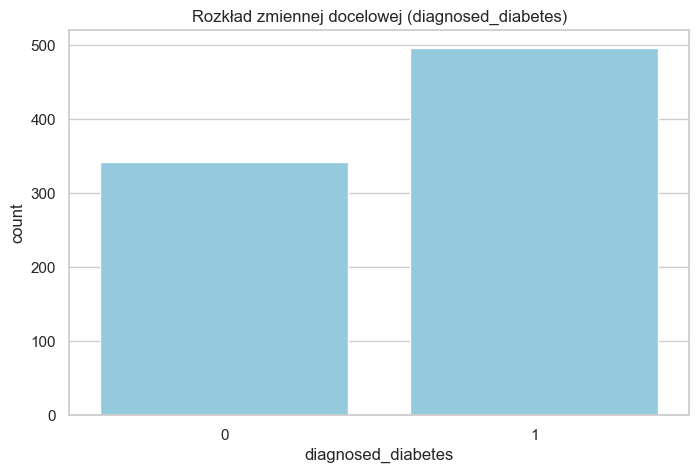

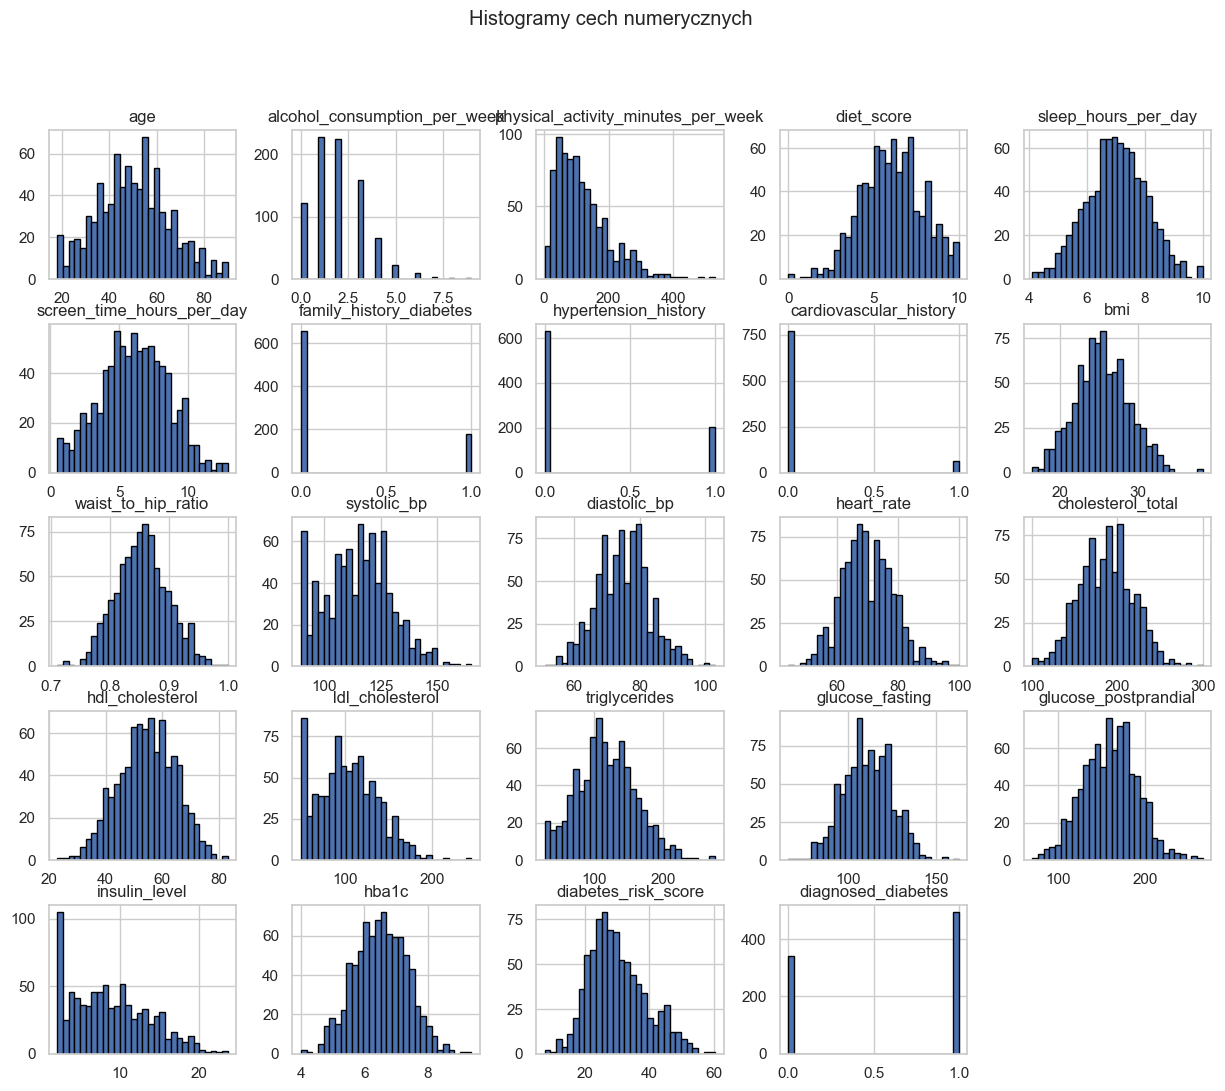

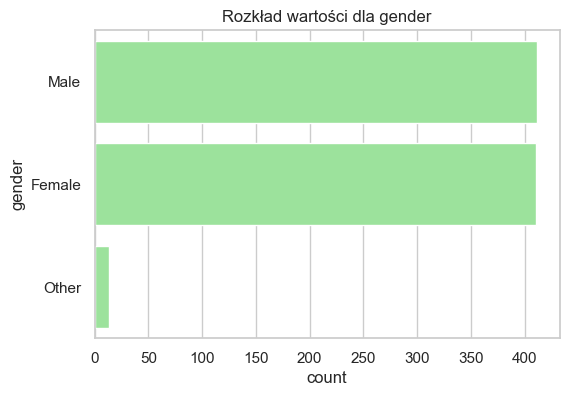

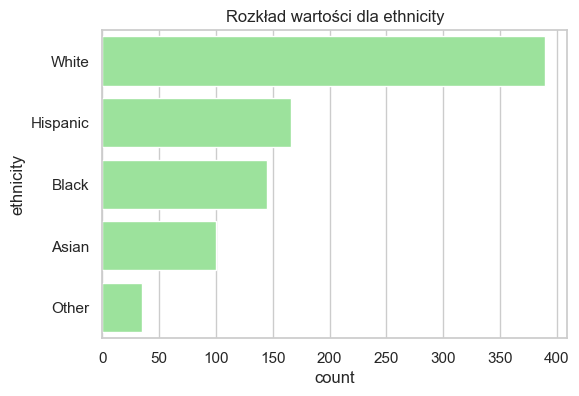

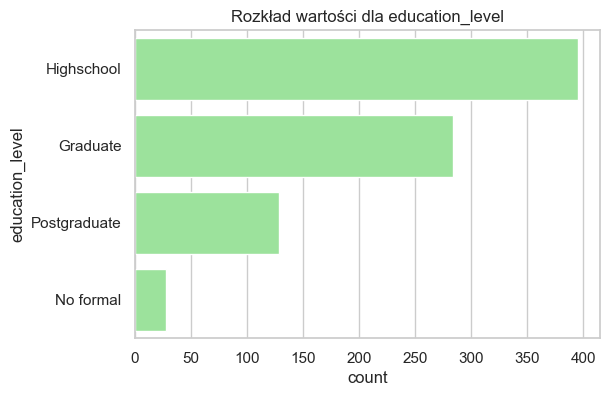

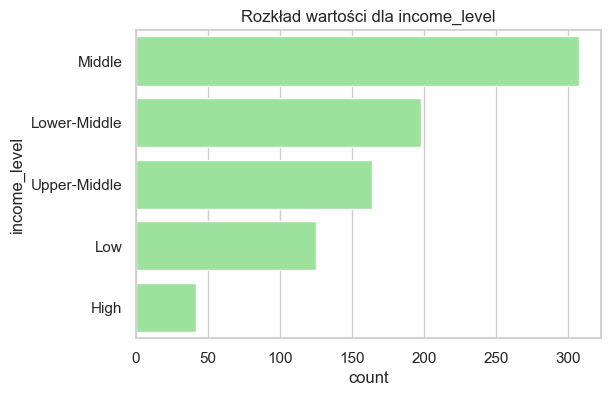

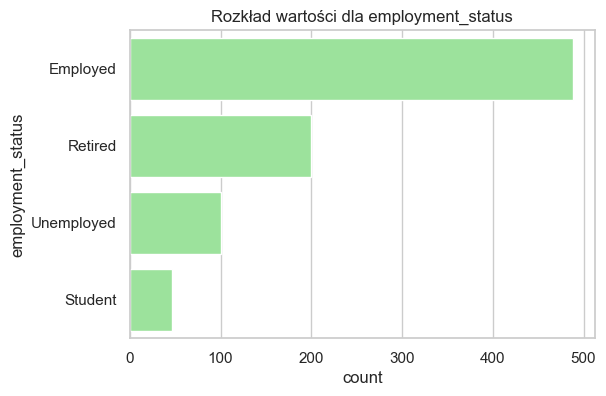

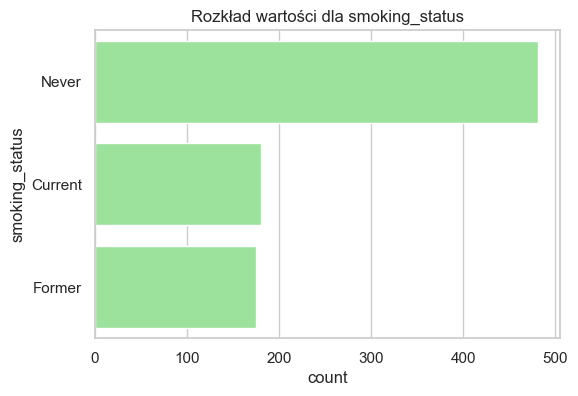

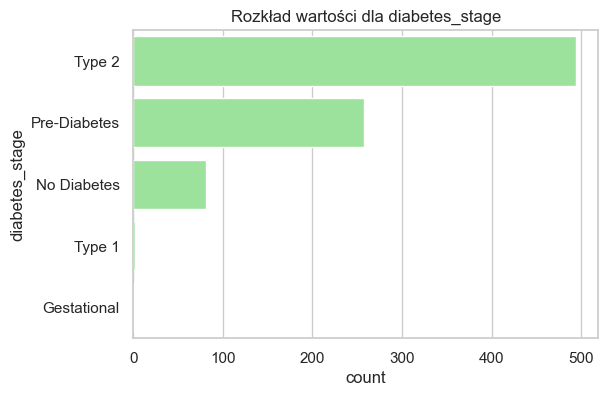

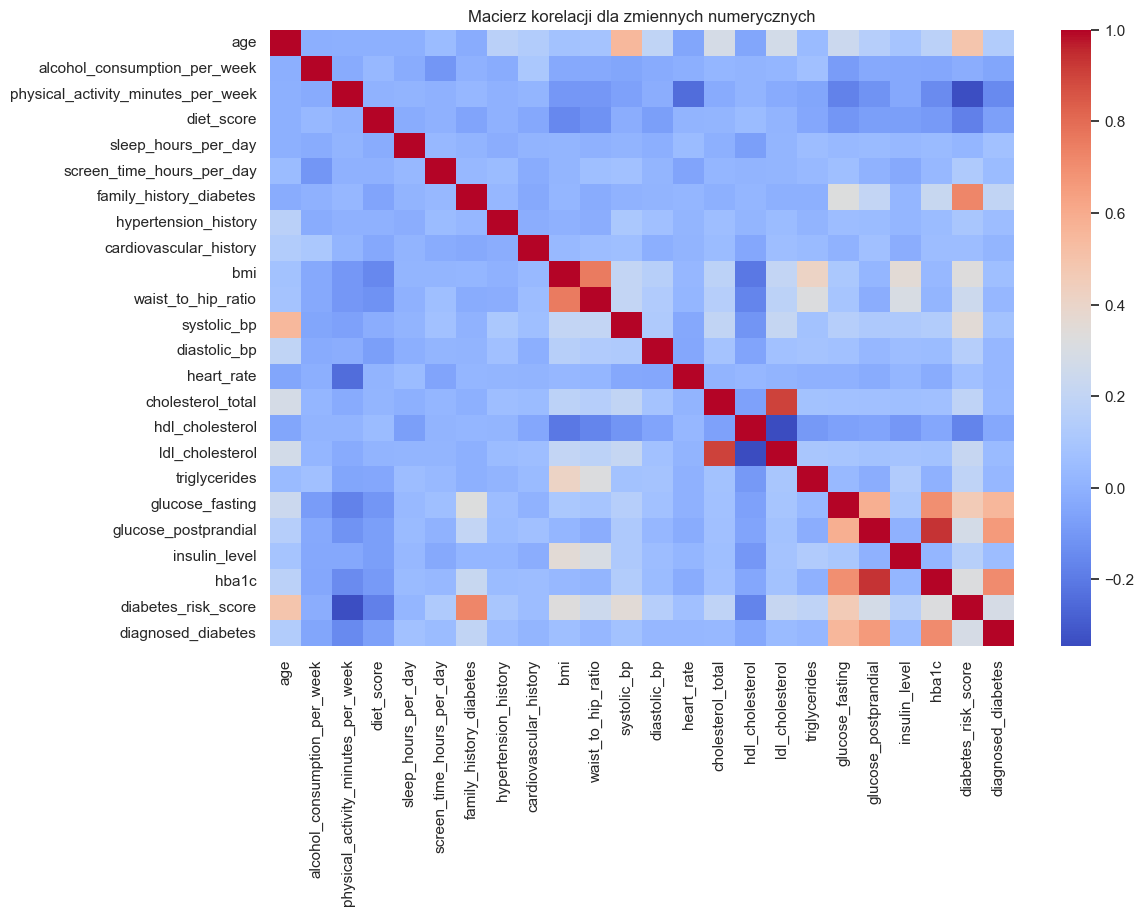

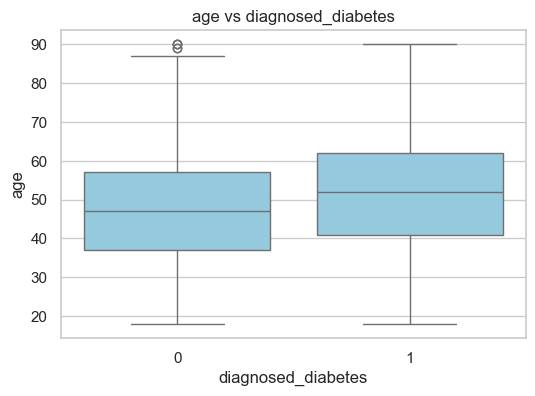

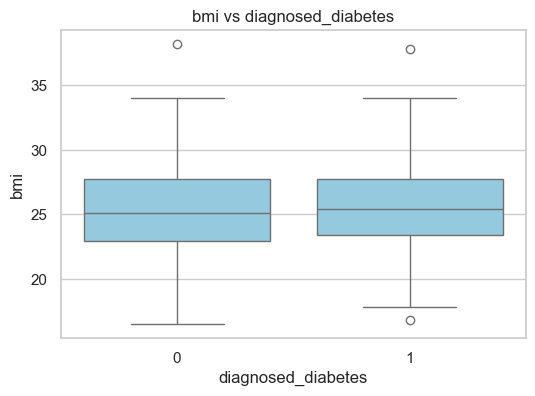

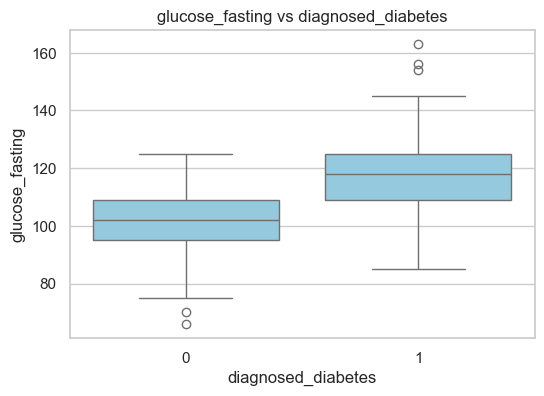

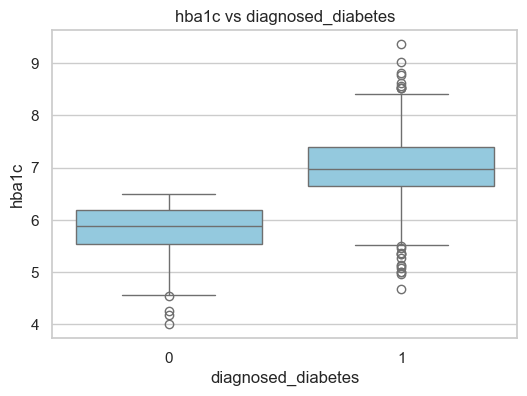

=== Podsumowanie EDA ===
- Zmienna docelowa: diagnosed_diabetes
- Liczba obserwacji: 836
- Liczba cech: 31
- Cechy numeryczne: 24
- Cechy kategoryczne: 7
Analiza wstępna zakończona ✅


In [26]:
# ============================================
# 01_eda.ipynb — Wstępna analiza danych (EDA)
# Cel: analiza danych o ryzyku cukrzycy
# Target: diagnosed_diabetes (binarny: tak/nie)
# ============================================

# --- 1. Import potrzebnych bibliotek ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wykresów
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.set_option('display.max_columns', None)

# --- 2. Wczytanie danych ---
df = pd.read_csv(r"../data/01_raw/sample_dummy.csv")

# --- 3. Podstawowe informacje o zbiorze ---
print("=== Podstawowe informacje o danych ===")
print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}\n")

print("=== Typy kolumn ===")
print(df.dtypes.value_counts(), "\n")

print("=== Przykładowe wiersze ===")
display(df.head())

# --- 4. Sprawdzenie brakujących wartości ---
print("=== Brakujące wartości w zbiorze ===")
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
if len(missing) == 0:
    print("Brak brakujących wartości 🎉")
else:
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({"Liczba braków": missing, "% braków": missing_percent})
    display(missing_df)

    # Wizualizacja braków
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Mapa brakujących wartości")
    plt.show()

# --- 5. Statystyki opisowe ---
print("=== Statystyki opisowe (numeryczne) ===")
display(df.describe())

print("=== Statystyki opisowe (kategoryczne) ===")
display(df.describe(include='object'))

# --- 6. Analiza zmiennej docelowej (targetu) ---
target = "diagnosed_diabetes"
print(f"=== Analiza targetu: {target} ===")
print(df[target].value_counts())
print("\nProcentowy rozkład klas:")
print(df[target].value_counts(normalize=True) * 100)

# Wykres rozkładu klas (future-proof)
sns.countplot(x=target, data=df, color="skyblue")
plt.title("Rozkład zmiennej docelowej (diagnosed_diabetes)")
plt.show()

# --- 7. Rozkłady cech numerycznych ---
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Histogramy dla cech numerycznych
df[num_cols].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle("Histogramy cech numerycznych")
plt.show()

# --- 8. Rozkłady cech kategorycznych ---
for col in cat_cols:
    if df[col].nunique() <= 10 and col != target:
        plt.figure(figsize=(6, 4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, color="lightgreen")
        plt.title(f"Rozkład wartości dla {col}")
        plt.show()

# --- 9. Korelacje między cechami numerycznymi ---
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Macierz korelacji dla zmiennych numerycznych")
plt.show()

# --- 10. Zależność wybranych cech od targetu ---
top_features = ['age', 'bmi', 'glucose_fasting', 'cholesterol', 'hba1c']
for col in top_features:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=df, color="skyblue")
        plt.title(f"{col} vs {target}")
        plt.show()

# --- 11. Podsumowanie ---
print("=== Podsumowanie EDA ===")
print(f"- Zmienna docelowa: {target}")
print(f"- Liczba obserwacji: {df.shape[0]}")
print(f"- Liczba cech: {df.shape[1]}")
print(f"- Cechy numeryczne: {len(num_cols)}")
print(f"- Cechy kategoryczne: {len(cat_cols)}")
print("Analiza wstępna zakończona ✅")


In [27]:
print("Wybraliśmy ROC-AUC ponieważ:")
print(" Mierzy, jak dobrze model rozróżnia chorych od zdrowych.")
print(" Działa dobrze przy niezbalansowanych klasach (np. mniej chorych niż zdrowych).")

Wybraliśmy ROC-AUC ponieważ:
 Mierzy, jak dobrze model rozróżnia chorych od zdrowych.
 Działa dobrze przy niezbalansowanych klasach (np. mniej chorych niż zdrowych).
